### Author Statement
This project has been developed by Mustafa Neguib who is a student of
Masters of Information Technology at The University of Melbourne.
You can contact the developer at mustafa.neguib@gmail.com
Website: http://www.mustafaneguib.com
github: http://github.com/mustafaneguib/

In [115]:
#https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset=pd.read_csv('Weather.csv')

C:\Users\Mustafa Neguib\Anaconda3\envs\osmnx_text\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dataset.shape

(119040, 31)

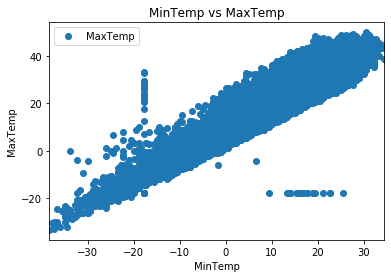

In [8]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

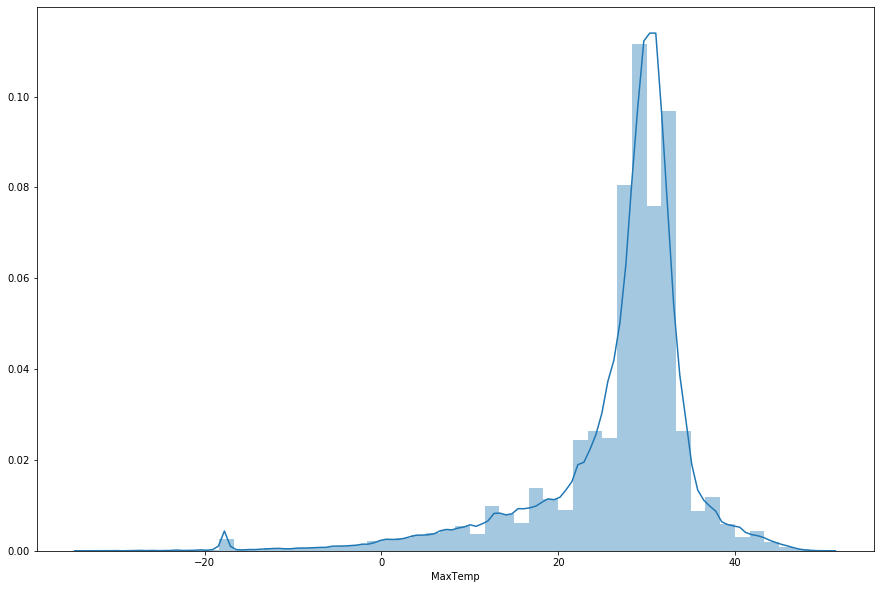

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

In [52]:
X = dataset['MinTemp'].values.reshape(dataset['MinTemp'].values.shape[0],1)#using -1 is the same as using dataset['MinTemp'].shape[0]
y = dataset['MaxTemp'].values.reshape(dataset['MaxTemp'].values.shape[0],1)

In [53]:
X

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [18.33333333],
       [18.33333333],
       [17.22222222]])

In [54]:
y

array([[25.55555556],
       [28.88888889],
       [26.11111111],
       ...,
       [28.33333333],
       [28.33333333],
       [29.44444444]])

In [92]:
X_train=X[:int(X.shape[0]*0.8),:]
X_test=X[int(X.shape[0]*0.8):,:]
y_train=y[:int(y.shape[0]*0.8),:]
y_test=y[int(y.shape[0]*0.8):,:]

In [93]:
X_train

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [19.44444444],
       [18.33333333],
       [21.11111111]])

In [94]:
y_test

array([[37.77777778],
       [36.11111111],
       [35.55555556],
       ...,
       [28.33333333],
       [28.33333333],
       [29.44444444]])

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
regressor= LinearRegression()

In [99]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
regressor.intercept_

array([10.66185201])

In [101]:
regressor.coef_

array([[0.92033997]])

In [103]:
y_predict=regressor.predict(X_test)

In [104]:
y_predict.flatten()

array([33.67035117, 30.0912513 , 26.51215143, ..., 32.64775121,
       30.60255128, 31.62515124])

In [114]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})
df.head()

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852


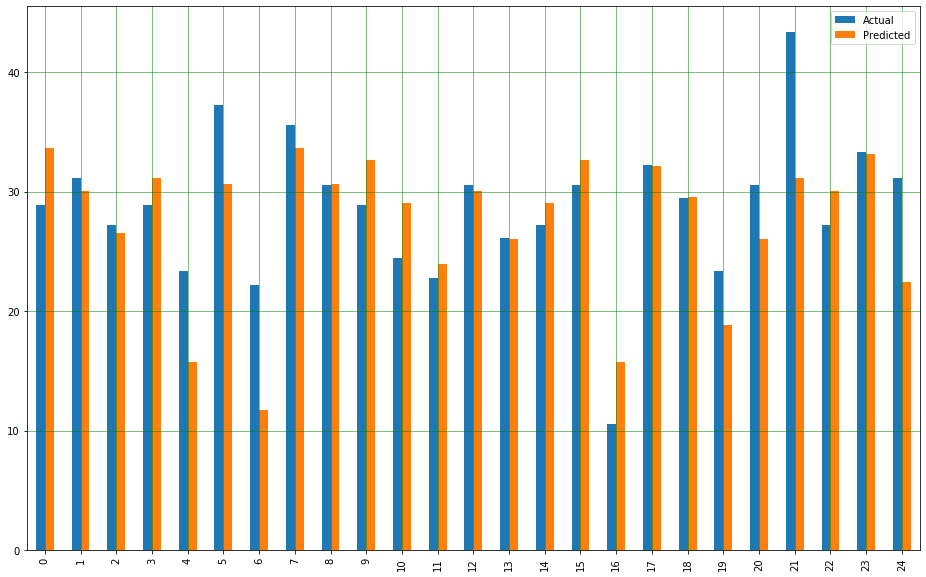

In [107]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

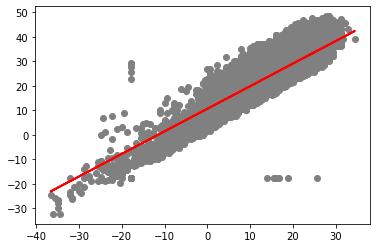

In [111]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_predict, color='red', linewidth=2)
plt.show()

In [113]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 3.1993291783785285
Mean Squared Error: 17.631568097568444
Root Mean Squared Error: 4.198996082109204


https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/

In [13]:
data = np.array([[11, 22, 33],
[44, 55, 66],
[77, 88, 99]])

In [32]:
X=data[:,:-1]

In [26]:
Y=data[:,-1]

In [27]:
Y

array([33, 66, 99])

In [33]:
X

array([[11, 22],
       [44, 55],
       [77, 88]])

In [34]:
train=data[:2,:]
train

array([[11, 22, 33],
       [44, 55, 66]])

In [35]:
test=data[2:,:]
test

array([[77, 88, 99]])

In [42]:
#from 1d to 2d array
data = np.array([11, 22, 33, 44, 55])
print(data.shape)
print(data)
data = data.reshape((data.shape[0], 1))
print(data.shape)
print(data)

(5,)
[11 22 33 44 55]
(5, 1)
[[11]
 [22]
 [33]
 [44]
 [55]]
